In [4]:
import pickle
from matplotlib import pyplot as plt
from pathlib import Path

In [5]:
FILENAME = "DA+BMAC"

In [7]:
# Load values from latest pickle file in ./FILENAME/ directory
# Look for a folder named by FILENAME in a few likely locations relative to this notebook
search_paths = [Path(FILENAME), Path('.') / FILENAME, Path('results') / FILENAME, Path('..') / FILENAME]

data_dir = None
for p in search_paths:
    if p.exists() and p.is_dir():
        data_dir = p
        break

if data_dir is None:
    raise FileNotFoundError(f"No directory found for FILENAME '{FILENAME}' in: {', '.join(str(p) for p in search_paths)}")

# Collect pickle candidates
pkl_files = sorted(list(data_dir.glob('*.pkl')) + list(data_dir.glob('*.pickle')), key=lambda p: p.stat().st_mtime)
if not pkl_files:
    raise FileNotFoundError(f"No pickle files (*.pkl, *.pickle) found in {data_dir}")

latest = pkl_files[-1]
print(f"Loading latest pickle: {latest} (modified: {latest.stat().st_mtime})")

with latest.open('rb') as fh:
    data = pickle.load(fh)


Loading latest pickle: DA+BMAC/DA+BMAC_results_20250902_192204.pkl (modified: 1756821124.736776)


In [13]:
data

{0.001: {'total_received_packets': 494,
  'total_received_flits': 3952,
  'received_ideal_flits_ratio': 0.0779672,
  'average_wireless_utilization': 0.475709,
  'global_average_delay': 8.9413,
  'max_delay': 21,
  'network_throughput': 0.0399192,
  'average_ip_throughput': 0.000623737,
  'total_energy': 9.63778e-05,
  'dynamic_energy': 5.60569e-07,
  'static_energy': 9.58173e-05,
  'buffer_data': [{'router_id': 0,
    'buffer_n_mean': None,
    'buffer_n_max': None,
    'buffer_e_mean': 0.999149,
    'buffer_e_max': 1,
    'buffer_s_mean': 0.999522,
    'buffer_s_max': 1,
    'buffer_w_mean': None,
    'buffer_w_max': None,
    'buffer_l_mean': 0.991247,
    'buffer_l_max': 1},
   {'router_id': 1,
    'buffer_n_mean': None,
    'buffer_n_max': None,
    'buffer_e_mean': 0.0,
    'buffer_e_max': 0,
    'buffer_s_mean': 0.999327,
    'buffer_s_max': 1,
    'buffer_w_mean': 0.997403,
    'buffer_w_max': 1,
    'buffer_l_mean': 0.993207,
    'buffer_l_max': 1},
   {'router_id': 2,
    'buf

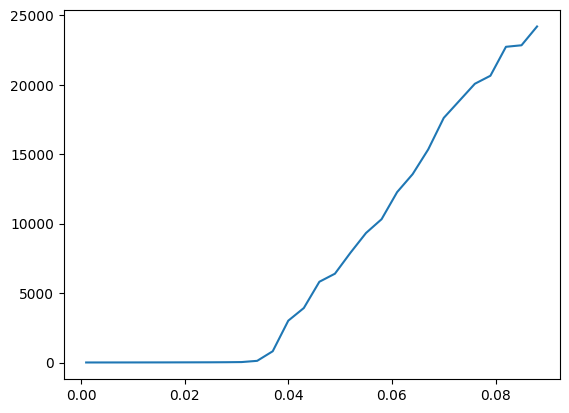

In [11]:
plt.plot(data.keys(), [data[k]['global_average_delay'] for k in data.keys()])

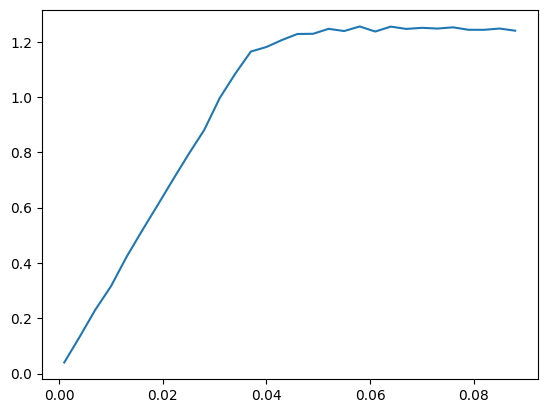

In [14]:
plt.plot(data.keys(), [data[k]['network_throughput'] for k in data.keys()])